## Fonte de dados

O dataset utilizado nessa análise foi encontrado no Kaggle e contém dados das 50 músicas mais ouvidas de 2019 no Spotify. 

O arquivo pode ser acessado no link: https://www.kaggle.com/leonardopena/top50spotify2019

## Importando as bibliotecas

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura e visualização do dataset

In [2]:
dados = pd.read_csv('top50.csv', sep = ',', encoding = 'ISO-8859-1')

In [3]:
dados.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [4]:
# Significados das colunas

# Track.Name = Name of the Track
# Artist.Name = Name of the Artist
# Genre = the genre of the track
# Beats.Per.Minute = The tempo of the song.
# Energy = The energy of a song - the higher the value, the more energtic. song
# Danceability = The higher the value, the easier it is to dance to this song.
# Loudness..dB.. = The higher the value, the louder the song.
# Liveness = The higher the value, the more likely the song is a live recording.
# Valence. = The higher the value, the more positive mood for the song.
# Length. = The duration of the song.
# Acousticness.. = The higher the value the more acoustic the song is.
# Speechiness. = The higher the value the more spoken word the song contains.
# Popularity = The higher the value the more popular the song is.

## Análise exploratória

In [5]:
# Verificando a existência de valores nulos e tipo dos dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [6]:
# Análise estatística inicial das variáveis numéricas

dados.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [7]:
# Renomeando as colunas para facilitar a manipulação dos dados

nome_coluna = { 'Track.Name':'track_name',
    'Artist.Name': 'artist',
    'Genre': 'genre',
    'Beats.Per.Minute':'bpm',
    'Energy': 'energy',
    'Danceability': 'danceability',
    'Loudness..dB..':'loudness',
    'Liveness': 'liveness', 
    'Valence.': 'valence', 
    'Length.': 'length',
    'Acousticness..': 'acousticness', 
    'Speechiness.': 'speechiness', 
    'Popularity': 'popularity'}

dados.rename(columns = nome_coluna, inplace = True)

In [8]:
# Removendo coluna unnamed pois está sendo utilizada somente como index e não é relevante na análise dos dados

del dados['Unnamed: 0']

# Avaliando correlações

In [9]:
# Verificando correlações entre as variáveis

correlacao = dados.corr()
correlacao

,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
bpm,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
loudness,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
valence,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
length,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
acousticness,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
speechiness,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


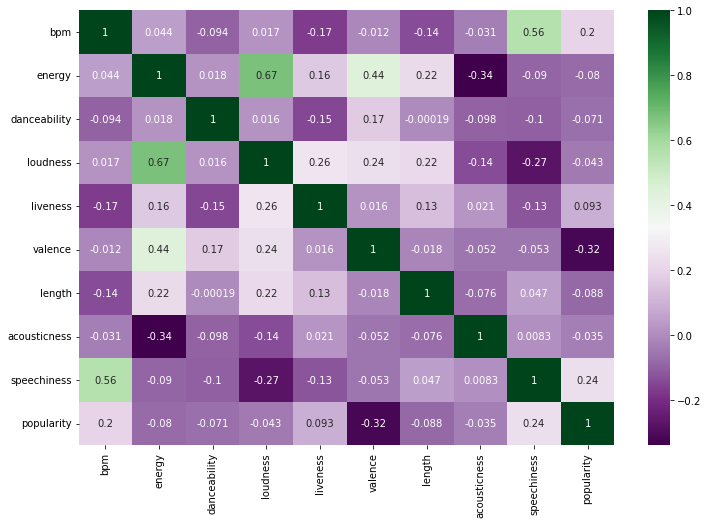

In [31]:
# Avaliando correlações pelo mapa de calor de modo a facilitar a visualização

ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(correlacao, annot=True, cmap = 'PRGn')

Avaliando as correlações entre as variáveis é possível identificar destaques para a correlação positiva entre 'loudness' e 'energy', bem como a correlação negativa entre 'energy' e 'acousticness'.

Destacando as correlações da variável popularity, verifica-se que 'speechiness' e 'bpm' tem o maior efeito positivo sobre a mesma. Em contrapartida, 'valence' tem uma relação inversa com a popularidade, o que traz um indício de que músicas menos positivas são mais populares.

<AxesSubplot:>

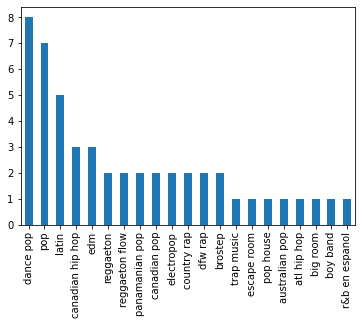

In [32]:
# Avaliando gênero musical que figurou mais vezes entre as 50 músicas mais ouvidas de 2019 no Spotify

dados.genre.value_counts().plot(kind='bar')

É possível identificar que o gênero mais popular dentre as 50 músicas mais ouvidas de 2019 no Spotify foi o dance pop, com 8 músicas, seguido de pop com 7 canções e latina com 5.

In [33]:
# Avaliando os artistas que mais emplacaram músicas no Top 50 do Spotify em 2019

dados.artist.value_counts()

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: artist, dtype: int64

Aqui verifica-se que o artista mais bem sucedido em quantidade de músicas no top 50 foi Ed Sheeran, colocando um total de 4 músicas entre as mais ouvidas de 2019.